# Postwork 5

Leemos el dataset resultante del proyecto anterior para hacer un analisis de los valores estadisticos "mas conocidos" en México, pero aplicado a las personas desaparecidas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/chucho003/Proyecto-_Fase3_Python/main/RNPEDFC_Final.csv", encoding='ISO-8859-1')
df

,anio,fecha,hora,dias_desaparecido,entidad,municipio,localidad,coordenadas,nacionalidad,sexo,edad,estatura,complexion,senas_particulares,discapacidad,dependecia_origen
0,2012,2012-03-18,05:00:00,2234,Sonora,Navojoa,Navojoa,"27.069053, -109.439423",Mexicana,Mujer,7,1.10,Delgada,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
1,2007,2007-02-05,02:00:26,4102,Estado De Mexico,Valle De Bravo,Valle De Bravo,"19.16368, -100.134684",Mexicana,Mujer,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
2,2009,2009-03-14,08:30:54,3334,Estado De Mexico,Chalco,Chalco,"19.266337, -98.8978",Mexicana,Hombre,6,1.10,Delgada,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
3,2006,2006-12-23,08:00:28,4146,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,"19.547512, -99.193851",Mexicana,Hombre,10,1.10,Delgada,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
4,2008,2008-01-11,12:00:17,3762,Estado De Mexico,Toluca,Toluca,"18.078, -91.6552",Mexicana,Hombre,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35896,2018,2018-04-26,08:00:00,4,Puebla,Puebla,Puebla,"19.051201, -98.212116",Mexicana,Hombre,22,1.60,Delgada,Lunar En La Mejilla Y Tatuaje En El Cuello En ...,Ninguno,FGE - Puebla
35897,2018,2018-01-08,11:00:00,112,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Mujer,27,1.70,Robusta,"El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...",Ninguno,PGJ - Colima
35898,2015,2015-02-02,07:00:00,1183,Puebla,Chila,Chilas De Las Flores,"17.965896, -97.864616",Mexicana,Mujer,86,1.77,Mediana,No Especificado,Ninguno,FGE - Puebla
35899,2017,2017-08-22,04:00:00,251,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Hombre,41,1.76,Robusta,Tatuaje En El Brazo Izquierdo Con La Imagen De...,Ninguno,PGJ - Colima


Separamos nuestras variables categóricas y nuestras variables numéricas del dataset, para poder describir las variables numéricas más representantes de las personas desaparecidas en México.

In [53]:
col_categoricas=["entidad", "municipio", "localidad", "nacionalidad", "sexo", "complexion"]
col_numericas=["dias_desaparecido", "edad", "estatura"]
desaparecido=["dias_desaperecido"]
df[col_numericas].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
dias_desaparecido,35901.0,1605.552269,1123.028395,1.0,647.00,1518.00,2455.0,18166.00
edad,35901.0,30.549929,14.370017,1.0,21.00,28.00,38.0,103.00
estatura,35901.0,1.639094,0.136044,0.3,1.62,1.64,1.7,2.04


Con la descripción anterior se puede observa que el promedio de tiempo de las personas desaparecidas es de 4 años, la edad es de adultos jóvenes con 30 años de edad y una estatura de 1.63 metros.

**¿En Mexico desaparecen mas o hombres o mujeres?**

Con respecto al aunmento de la violencia de género en la actualidad, se muestra que en el rango de tiempo del Dataset que comprende de 1968 a 2018 los sujetos masculinos son quienes desaparecieron mas 

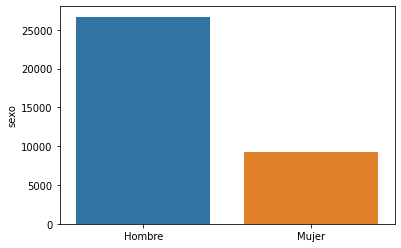

In [14]:
counts=df["sexo"].value_counts()
sns.barplot(x=counts.index, y=counts)

**¿Que tipo de complexión tienen las personas desaparecidas?**



Otro dato estadistico que resultó interesante con respecto a que  México es un pais de obesos, es que la mayoria de las personas desaparecidas tienen una complexión delgada  

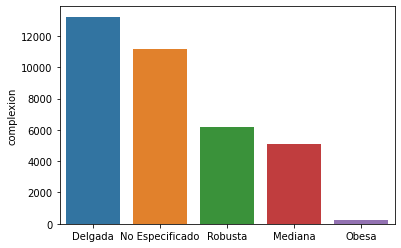

In [16]:
counts2=df["complexion"].value_counts()
sns.barplot(x=counts2.index, y=counts2)

**La estatura promedio del mexicano**

por medio de bootstrapping comprobaremos la "estatura promedio del mexicano" en el set de datos de personas desaparecidas 

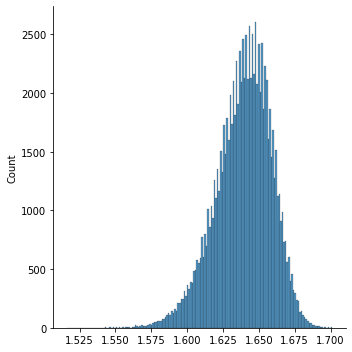

In [41]:
altura = df['estatura']

medias = []

for i in range(100_000):
    sample = altura.sample(n=50, replace=True)
    medias.append(sample.mean())
    
media_alturas = pd.Series(medias)

sns.displot(media_alturas);

In [51]:
Kurtosis= {round(media_alturas.kurtosis(),95)}
Kurtosis

{0.44515521947474884}

Efectivamente lo anterior nos demuestra que "la estatura promedio" del mexicano comprende alrededor de 1.65 m una curtosis positiva de 0.44.

**El error estandar de nuesto campo de estatura**

In [42]:
print(f'Error estandar: {media_alturas.std()}')

Error estandar: 0.019273847748855304


In [43]:
print(f'Valor mínimo: {media_alturas.min()}')
print(f'Valor máximo: {media_alturas.max()}')
print(f'Rango: {media_alturas.max() - media_alturas.min()}')

Valor mínimo: 1.516
Valor máximo: 1.7012
Rango: 0.18520000000000003


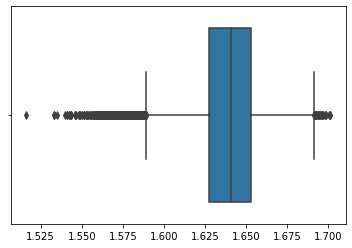

In [44]:
sns.boxplot(x=media_alturas);

**Intervalo de confianza**

Utilizando un intervalo de confianza de 95 %

In [45]:
limite_inferior = media_alturas.quantile(0.025)
limite_superior = media_alturas.quantile(0.975)

In [39]:
mean_of_intervals = ((altura.mean() - limite_inferior) + (limite_superior - altura.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {altura.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 1.6390941756497033 +/- 0.03749999999999998


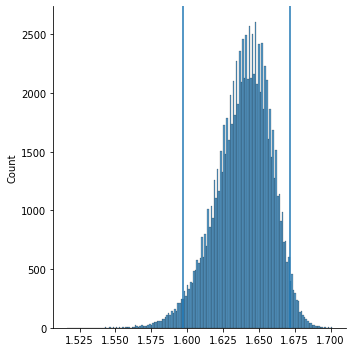

In [46]:
sns.displot(media_alturas, kde=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);




Con esto se comprobó que la mayoria de las estaturas de las personas desaparecidas si cae en en este nuevo intervalo